In [ ]:
#pip install nbformat

# Opening one file for testing

In [1]:
import pandas as pd

In [17]:
import nbformat

# selecting filepath for first file
file_path = "C:\\ESTERA\\CCT\\TWEETS\\workloads\\MySQL_WORKLOADA.text"

try:
    with open(file_path, "r") as file:
        file_contents = file.read()
        print(file_contents)
except FileNotFoundError:
    print(f"The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

/usr/bin/java  -classpath /home/hduser/ycsb-0.17.0/conf:/home/hduser/ycsb-0.17.0/lib/HdrHistogram-2.1.4.jar:/home/hduser/ycsb-0.17.0/lib/core-0.17.0.jar:/home/hduser/ycsb-0.17.0/lib/htrace-core4-4.1.0-incubating.jar:/home/hduser/ycsb-0.17.0/lib/jackson-core-asl-1.9.4.jar:/home/hduser/ycsb-0.17.0/lib/jackson-mapper-asl-1.9.4.jar:/home/hduser/ycsb-0.17.0/jdbc-binding/conf:/home/hduser/ycsb-0.17.0/jdbc-binding/lib/commons-collections-3.2.1.jar:/home/hduser/ycsb-0.17.0/jdbc-binding/lib/commons-lang-2.4.jar:/home/hduser/ycsb-0.17.0/jdbc-binding/lib/commons-pool-1.5.4.jar:/home/hduser/ycsb-0.17.0/jdbc-binding/lib/geronimo-jms_1.1_spec-1.1.1.jar:/home/hduser/ycsb-0.17.0/jdbc-binding/lib/geronimo-jta_1.1_spec-1.1.1.jar:/home/hduser/ycsb-0.17.0/jdbc-binding/lib/jdbc-binding-0.17.0.jar:/home/hduser/ycsb-0.17.0/jdbc-binding/lib/mysql-connector-java-8.0.30.jar:/home/hduser/ycsb-0.17.0/jdbc-binding/lib/openjpa-jdbc-2.1.1.jar:/home/hduser/ycsb-0.17.0/jdbc-binding/lib/openjpa-kernel-2.1.1.jar:/home/h

### Checking all files in the folder

In [73]:
import os

# specifing the folder path where files are located
folder_path = "C:\\ESTERA\\CCT\\TWEETS\\workloads"

# listing all files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.text')]

if not files:
    print("No .txt files found in the 'workloads' folder.")
else:
    print("Found the following .text files in the 'workloads' folder:")
    for file_name in files:
        print(file_name)

Found the following .text files in the 'workloads' folder:
Mongo_workloada.text
Mongo_workloadb.text
Mongo_workloadc.text
Mongo_workloadd.text
Mongo_workloade.text
Mongo_workloadf.text
MySQL_workloada.text
MySQL_workloadb.text
MySQL_workloadc.text
MySQL_workloadd.text
MySQL_workloade.text
MySQL_workloadf.text


In [61]:
# listing all files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith('.text')]

# creating the main DataFrame
data = {
    'Action': [
        '[OVERALL]', '[OVERALL]', '[TOTAL_GCS_Copy]', '[TOTAL_GC_TIME_Copy]',
        '[TOTAL_GC_TIME_%_Copy]', '[TOTAL_GCS_MarkSweepCompact]', '[TOTAL_GC_TIME_MarkSweepCompact]',
        '[TOTAL_GC_TIME_%_MarkSweepCompact]', '[TOTAL_GCs]', '[TOTAL_GC_TIME]', '[TOTAL_GC_TIME_%]',
        '[CLEANUP]', '[CLEANUP]', '[CLEANUP]', '[CLEANUP]', '[CLEANUP]', '[CLEANUP]', '[INSERT]', '[INSERT]',
        '[INSERT]', '[INSERT]', '[INSERT]', '[INSERT]', '[INSERT]'
    ],
    'Something': [
        'RunTime(ms)', 'Throughput(ops/sec)', 'Count', 'Time(ms)', 'Time(%)', 'Count', 'Time(ms)',
        'Time(%)', 'Count', 'Time(ms)', 'Time(%)', 'Operations', 'AverageLatency(us)', 'MinLatency(us)',
        'MaxLatency(us)', '95thPercentileLatency(us)', '99thPercentileLatency(us)', 'Operations',
        'AverageLatency(us)', 'MinLatency(us)', 'MaxLatency(us)', '95thPercentileLatency(us)',
        '99thPercentileLatency(us)', 'Return=OK'
    ]
}

df = pd.DataFrame(data)
print(df)

                                Action                  Something
0                            [OVERALL]                RunTime(ms)
1                            [OVERALL]        Throughput(ops/sec)
2                     [TOTAL_GCS_Copy]                      Count
3                 [TOTAL_GC_TIME_Copy]                   Time(ms)
4               [TOTAL_GC_TIME_%_Copy]                    Time(%)
5         [TOTAL_GCS_MarkSweepCompact]                      Count
6     [TOTAL_GC_TIME_MarkSweepCompact]                   Time(ms)
7   [TOTAL_GC_TIME_%_MarkSweepCompact]                    Time(%)
8                          [TOTAL_GCs]                      Count
9                      [TOTAL_GC_TIME]                   Time(ms)
10                   [TOTAL_GC_TIME_%]                    Time(%)
11                           [CLEANUP]                 Operations
12                           [CLEANUP]         AverageLatency(us)
13                           [CLEANUP]             MinLatency(us)
14        

In [62]:
# iterating over files in the directory
for file_name in os.listdir(folder_path):
    if file_name.endswith(".text"):
        file_path = os.path.join(folder_path, file_name)

        # extracting the base file name (without the '.text' ending)
        file_name_without_extension = os.path.splitext(file_name)[0]

        # initializing empty lists to store data
        action = []
        something = []
        latency = []

        # reading the file and parse the data, skipping lines containing 'fetchSize'
        with open(file_path, "r") as file:
            for line in file:
                if 'fetchSize' in line:
                    continue
                parts = line.strip().split(', ')
                if len(parts) == 3:
                    action.append(parts[0])
                    something.append(parts[1])
                    latency.append(parts[2])

        # creating a temporary DataFrame for the current file
        temporary_data = {
           # 'Action': action,
           # 'Something': something,
            f"{file_name_without_extension}": latency
        }
        temporary_df = pd.DataFrame(temporary_data)

        # concatenating the temporary DataFrame to the final DataFrame
        df = pd.concat([df, temporary_df], axis=1)

# printing the final DataFrame
print(df)


                                Action                  Something  \
0                            [OVERALL]                RunTime(ms)   
1                            [OVERALL]        Throughput(ops/sec)   
2                     [TOTAL_GCS_Copy]                      Count   
3                 [TOTAL_GC_TIME_Copy]                   Time(ms)   
4               [TOTAL_GC_TIME_%_Copy]                    Time(%)   
5         [TOTAL_GCS_MarkSweepCompact]                      Count   
6     [TOTAL_GC_TIME_MarkSweepCompact]                   Time(ms)   
7   [TOTAL_GC_TIME_%_MarkSweepCompact]                    Time(%)   
8                          [TOTAL_GCs]                      Count   
9                      [TOTAL_GC_TIME]                   Time(ms)   
10                   [TOTAL_GC_TIME_%]                    Time(%)   
11                           [CLEANUP]                 Operations   
12                           [CLEANUP]         AverageLatency(us)   
13                           [CLEA

In [63]:
df.head(25)

,Action,Something,Mongo_workloada,Mongo_workloadb,Mongo_workloadc,Mongo_workloadd,Mongo_workloade,Mongo_workloadf,MySQL_workloada,MySQL_workloadb,MySQL_workloadc,MySQL_workloadd,MySQL_workloade,MySQL_workloadf
0,[OVERALL],RunTime(ms),1312,1229,1316,1511,1363,1799,3541,3994,4470,3497,4048,3871
1,[OVERALL],Throughput(ops/sec),762.1951219512196,813.6696501220505,759.8784194528876,661.8133686300463,733.6757153338225,555.864369093941,282.4060999717594,250.37556334501753,223.71364653243847,285.9593937660852,247.03557312252966,258.3311805734952
2,[TOTAL_GCS_Copy],Count,2,2,2,2,2,2,3,3,3,3,3,3
3,[TOTAL_GC_TIME_Copy],Time(ms),10,11,15,14,11,12,45,24,27,27,30,23
4,[TOTAL_GC_TIME_%_Copy],Time(%),0.7621951219512195,0.8950366151342555,1.1398176291793314,0.9265387160820648,0.8070432868672046,0.6670372429127293,1.2708274498729173,0.6009013520280421,0.6040268456375839,0.77209036316843,0.7411067193675889,0.5941617153190389
5,[TOTAL_GCS_MarkSweepCompact],Count,0,0,0,0,0,0,0,0,0,0,0,0
6,[TOTAL_GC_TIME_MarkSweepCompact],Time(ms),0,0,0,0,0,0,0,0,0,0,0,0
7,[TOTAL_GC_TIME_%_MarkSweepCompact],Time(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,[TOTAL_GCs],Count,2,2,2,2,2,2,3,3,3,3,3,3
9,[TOTAL_GC_TIME],Time(ms),10,11,15,14,11,12,45,24,27,27,30,23


In [72]:
# identifing columns to convert to float (exclude 'Action' and 'Something')
columns_to_convert = [col for col in df.columns if col not in ['Action', 'Something']]

# converting the identified columns to float
df[columns_to_convert] = df[columns_to_convert].astype(float)

# rounding the numeric values to 2 decimal places
df[columns_to_convert] = df[columns_to_convert].round(2)

# checking the data types and values in the DataFrame
df.head(25)

,Action,Something,Mongo_workloada,Mongo_workloadb,Mongo_workloadc,Mongo_workloadd,Mongo_workloade,Mongo_workloadf,MySQL_workloada,MySQL_workloadb,MySQL_workloadc,MySQL_workloadd,MySQL_workloade,MySQL_workloadf
0,[OVERALL],RunTime(ms),1312.00,1229.00,1316.00,1511.00,1363.00,1799.00,3541.00,3994.00,4470.00,3497.00,4048.00,3871.00
1,[OVERALL],Throughput(ops/sec),762.20,813.67,759.88,661.81,733.68,555.86,282.41,250.38,223.71,285.96,247.04,258.33
2,[TOTAL_GCS_Copy],Count,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00
3,[TOTAL_GC_TIME_Copy],Time(ms),10.00,11.00,15.00,14.00,11.00,12.00,45.00,24.00,27.00,27.00,30.00,23.00
4,[TOTAL_GC_TIME_%_Copy],Time(%),0.76,0.90,1.14,0.93,0.81,0.67,1.27,0.60,0.60,0.77,0.74,0.59
5,[TOTAL_GCS_MarkSweepCompact],Count,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,[TOTAL_GC_TIME_MarkSweepCompact],Time(ms),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,[TOTAL_GC_TIME_%_MarkSweepCompact],Time(%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,[TOTAL_GCs],Count,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,3.00,3.00,3.00
9,[TOTAL_GC_TIME],Time(ms),10.00,11.00,15.00,14.00,11.00,12.00,45.00,24.00,27.00,27.00,30.00,23.00


# OVERALL RUN TIME 

In [66]:
df_run = df[df['Something'] == 'RunTime(ms)'].copy()

# resetting the index of the new DataFrame
df_run = df_run.reset_index(drop=True)
df_run.head()

,Action,Something,Mongo_workloada,Mongo_workloadb,Mongo_workloadc,Mongo_workloadd,Mongo_workloade,Mongo_workloadf,MySQL_workloada,MySQL_workloadb,MySQL_workloadc,MySQL_workloadd,MySQL_workloade,MySQL_workloadf
0,[OVERALL],RunTime(ms),1312.0,1229.0,1316.0,1511.0,1363.0,1799.0,3541.0,3994.0,4470.0,3497.0,4048.0,3871.0


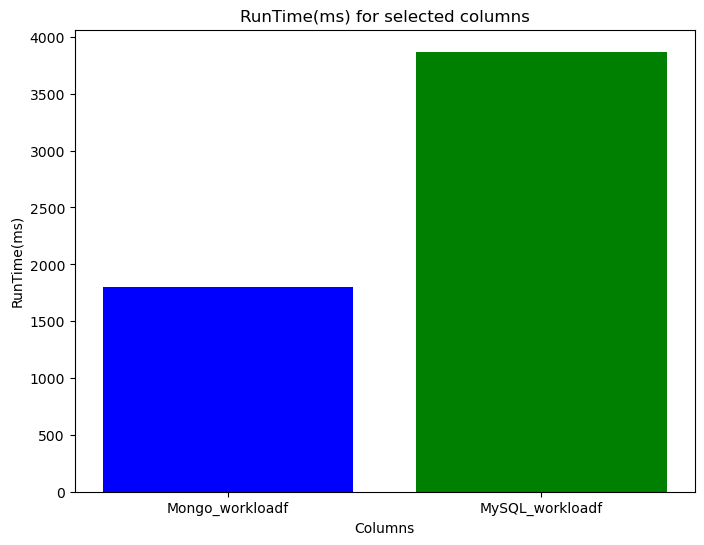

In [67]:
# filtering the columns that contain 'workloadf' in their titles
columns_to_plot = [col for col in df_run.columns if 'workloadf' in col]

# extracting 'Something' value
something = df_run['Something'][0]

# extracting the values for the selected columns
values = df_run[columns_to_plot].values[0]

# creating a bar chart with two bars
plt.figure(figsize=(8, 6))
plt.bar(columns_to_plot, values, color=['blue', 'green'])
plt.xlabel('Columns')
plt.ylabel(something)
plt.title(f'{something} for selected columns')
plt.xticks(rotation=0)

plt.show()

## MongoDB

In [68]:
# coping df as MongoDB_df
MongoDB_df = df.copy()

# dropping all columns in MongoDB_df where the column name has 'MySQL'
MongoDB_df = MongoDB_df.drop(columns=[col for col in MongoDB_df.columns if 'MySQL' in col])

# printing MongoDB_df
MongoDB_df.head(25)

,Action,Something,Mongo_workloada,Mongo_workloadb,Mongo_workloadc,Mongo_workloadd,Mongo_workloade,Mongo_workloadf
0,[OVERALL],RunTime(ms),1312.00,1229.00,1316.00,1511.00,1363.00,1799.00
1,[OVERALL],Throughput(ops/sec),762.20,813.67,759.88,661.81,733.68,555.86
2,[TOTAL_GCS_Copy],Count,2.00,2.00,2.00,2.00,2.00,2.00
3,[TOTAL_GC_TIME_Copy],Time(ms),10.00,11.00,15.00,14.00,11.00,12.00
4,[TOTAL_GC_TIME_%_Copy],Time(%),0.76,0.90,1.14,0.93,0.81,0.67
5,[TOTAL_GCS_MarkSweepCompact],Count,0.00,0.00,0.00,0.00,0.00,0.00
6,[TOTAL_GC_TIME_MarkSweepCompact],Time(ms),0.00,0.00,0.00,0.00,0.00,0.00
7,[TOTAL_GC_TIME_%_MarkSweepCompact],Time(%),0.00,0.00,0.00,0.00,0.00,0.00
8,[TOTAL_GCs],Count,2.00,2.00,2.00,2.00,2.00,2.00
9,[TOTAL_GC_TIME],Time(ms),10.00,11.00,15.00,14.00,11.00,12.00


#### Overall run time

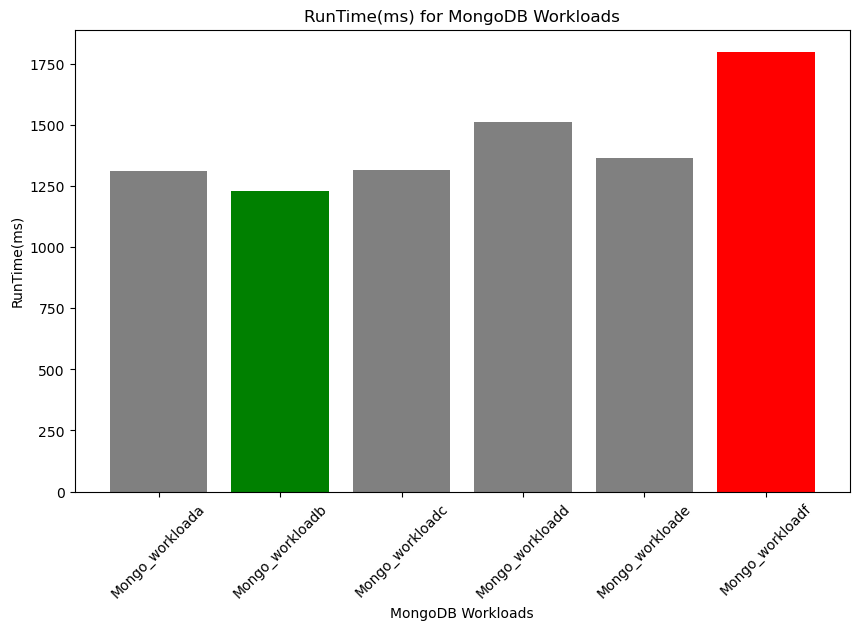

In [69]:
MongoDB_df_run = MongoDB_df[MongoDB_df['Something'] == 'RunTime(ms)'].copy()

# reseting the index of the new DataFrame
MongoDB_df_run = MongoDB_df_run.reset_index(drop=True)

MongoDB_df_run = MongoDB_df_run.drop('Action', axis=1)


# extracting the 'Something' values
something = 'RunTime(ms)'

# extracting the values for MongoDB workloads
MongoDB_df_run_columns = MongoDB_df_run.columns[1:]
values = MongoDB_df_run.loc[0, MongoDB_df_run_columns]

# converting values to a numeric data type
values_numeric = pd.to_numeric(values)

# calculating the minimum and maximum values
min_value = values_numeric.min()
max_value = values_numeric.max()

# setting colors based on values
bar_colors = ['red' if val == max_value else 'green' if val == min_value else 'grey' for val in values_numeric]

# creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(MongoDB_df_run_columns, values_numeric, color=bar_colors)
plt.xlabel('MongoDB Workloads')
plt.ylabel(something)
plt.title(f'{something} for MongoDB Workloads')
plt.xticks(rotation=45)

plt.show()

# MySQL

In [70]:
# coping df as MySQL_df
MySQL_df = df.copy()

# dropping all columns in MySQL_df where the column name has 'Mongo'
MySQL_df = MySQL_df.drop(columns=[col for col in MySQL_df.columns if 'Mongo' in col])

# printing MySQL
MySQL_df.head(25)

,Action,Something,MySQL_workloada,MySQL_workloadb,MySQL_workloadc,MySQL_workloadd,MySQL_workloade,MySQL_workloadf
0,[OVERALL],RunTime(ms),3541.00,3994.00,4470.00,3497.00,4048.00,3871.00
1,[OVERALL],Throughput(ops/sec),282.41,250.38,223.71,285.96,247.04,258.33
2,[TOTAL_GCS_Copy],Count,3.00,3.00,3.00,3.00,3.00,3.00
3,[TOTAL_GC_TIME_Copy],Time(ms),45.00,24.00,27.00,27.00,30.00,23.00
4,[TOTAL_GC_TIME_%_Copy],Time(%),1.27,0.60,0.60,0.77,0.74,0.59
5,[TOTAL_GCS_MarkSweepCompact],Count,0.00,0.00,0.00,0.00,0.00,0.00
6,[TOTAL_GC_TIME_MarkSweepCompact],Time(ms),0.00,0.00,0.00,0.00,0.00,0.00
7,[TOTAL_GC_TIME_%_MarkSweepCompact],Time(%),0.00,0.00,0.00,0.00,0.00,0.00
8,[TOTAL_GCs],Count,3.00,3.00,3.00,3.00,3.00,3.00
9,[TOTAL_GC_TIME],Time(ms),45.00,24.00,27.00,27.00,30.00,23.00


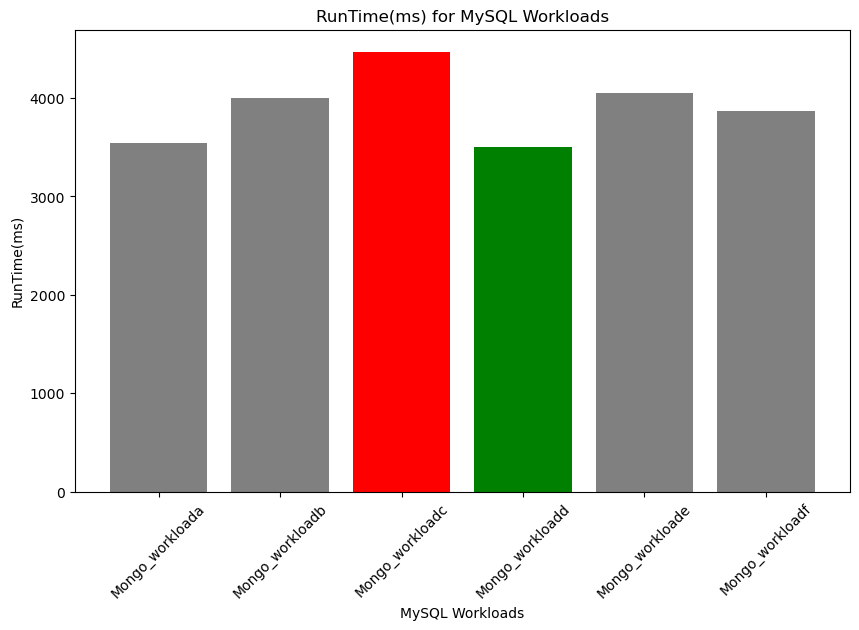

In [71]:
MySQL_df_run = MySQL_df[MySQL_df['Something'] == 'RunTime(ms)'].copy()

# resetting the index of the new DataFrame
MySQL_df = MySQL_df_run.reset_index(drop=True)
MySQL_df_run = MySQL_df_run.drop('Action', axis=1)

# extracting the 'Something' values
something = 'RunTime(ms)'

# extracting the values for MySQL workloads
MySQL_df_run_columns = MySQL_df_run.columns[1:]
values = MySQL_df_run.loc[0, MySQL_df_run_columns]

# converting values to a numeric data type
values_numeric = pd.to_numeric(values)

# calculating the minimum and maximum values
min_value = values_numeric.min()
max_value = values_numeric.max()

# setting colors based on values
bar_colors = ['red' if val == max_value else 'green' if val == min_value else 'grey' for val in values_numeric]

# creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(MongoDB_df_run_columns, values_numeric, color=bar_colors)
plt.xlabel('MySQL Workloads')
plt.ylabel(something)
plt.title(f'{something} for MySQL Workloads')
plt.xticks(rotation=45)

plt.show()